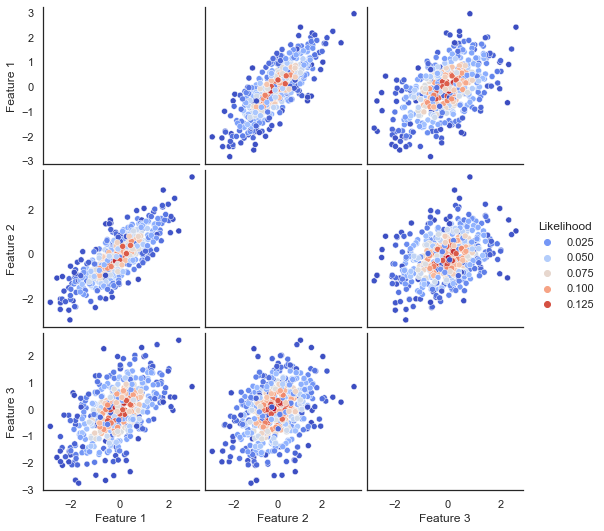

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import pandas as pd

# Generate a synthetic dataset with 3 features
np.random.seed(42)
mean = [0, 0, 0]
cov = [[1, 0.8, 0.6],
       [0.8, 1, 0.4],
       [0.6, 0.4, 1]]
data = np.random.multivariate_normal(mean, cov, size=500)

# Fit a multivariate Gaussian distribution to the data
fitted_mean = np.mean(data, axis=0)
fitted_cov = np.cov(data.T)

# Create a multivariate normal object using the fitted parameters
fitted_distribution = multivariate_normal(mean=fitted_mean, cov=fitted_cov)

# Calculate the likelihood of each data point given the fitted distribution
likelihoods = fitted_distribution.pdf(data)

# Add the likelihoods as a new column to the data
data_with_likelihoods = np.column_stack((data, likelihoods))

# Visualize the high-dimensional distribution using a pairplot
sns.set(style="white")
df = sns.load_dataset("iris")
columns = ["Feature 1", "Feature 2", "Feature 3", "Likelihood"]
sns.pairplot(pd.DataFrame(data_with_likelihoods, columns=columns), diag_kind="kde", hue="Likelihood", palette="coolwarm")
#plt.savefig('new GMM likelihood')
plt.show()

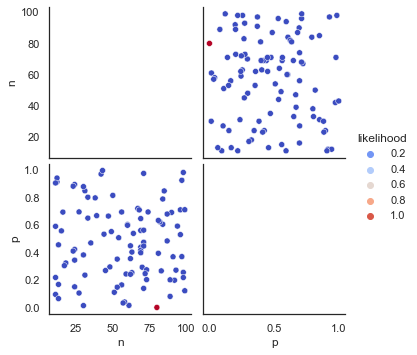

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import binom

# Generate synthetic datasets
np.random.seed(42)
num_datasets = 100
n_values = np.random.randint(10, 100, num_datasets)
p_values = np.random.rand(num_datasets)
binom_datasets = [np.random.binomial(n, p, 100) for n, p in zip(n_values, p_values)]

# Likelihood function for the Binomial distribution
def likelihood_binom(data, n, p):
    return np.prod(binom.pmf(data, n, p))

# Fit a Binomial distribution to each dataset and calculate the likelihoods
likelihoods = [likelihood_binom(data, n, p) for data, n, p in zip(binom_datasets, n_values, p_values)]

# Prepare the data for visualization
data_for_viz = pd.DataFrame({'n': n_values, 'p': p_values, 'likelihood': likelihoods})

# Visualize the high-dimensional probability distribution using a scatterplot matrix
sns.pairplot(data_for_viz, diag_kind='kde', hue='likelihood', palette='coolwarm')
#g = sns.pairplot(data_for_viz)
#g.fig.suptitle("Your plot title")
#plt.savefig('binomial likelihood')
plt.show()

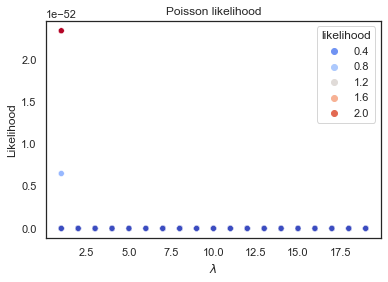

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import poisson

# Generate synthetic datasets
np.random.seed(42)
num_datasets = 100
lambda_values = np.random.randint(1, 20, num_datasets)
poisson_datasets = [np.random.poisson(lam, 100) for lam in lambda_values]

# Likelihood function for the Poisson distribution
def likelihood_poisson(data, lam):
    return np.prod(poisson.pmf(data, lam))

# Fit a Poisson distribution to each dataset and calculate the likelihoods
likelihoods = [likelihood_poisson(data, lam) for data, lam in zip(poisson_datasets, lambda_values)]

# Prepare the data for visualization
data_for_viz = pd.DataFrame({'lambda': lambda_values, 'likelihood': likelihoods})

# Visualize the high-dimensional probability distribution using a scatterplot matrix
sns.scatterplot(data=data_for_viz, x='lambda', y='likelihood', hue='likelihood', palette='coolwarm')
plt.xlabel("$\lambda$")
plt.ylabel("Likelihood")
plt.title("Poisson likelihood")
#plt.savefig('poisson likelihood')
plt.show()